# Importing Libraries

In [1304]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the dataset

In [1275]:
teaching = pd.read_csv('tae.csv')

In [1276]:
teaching.head()

,1,23,3,1.1,19,3.1
0,2,15,3,1,17,3
1,1,23,3,2,49,3
2,1,5,2,2,33,3
3,2,7,11,2,55,3
4,2,23,3,1,20,3


In [1277]:
teaching.shape

(150, 6)

**Observations**

- We loaded the dataset of the teaching assistance.
- In this dataset there is 150 rows and 6 columns

In [1278]:
teaching.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   1       150 non-null    int64
 1   23      150 non-null    int64
 2   3       150 non-null    int64
 3   1.1     150 non-null    int64
 4   19      150 non-null    int64
 5   3.1     150 non-null    int64
dtypes: int64(6)
memory usage: 7.2 KB


In [1279]:
teaching.rename(columns={'1':'Native_speaker'
                         ,'23':'Instructor'
                         ,'3':'Course'
                         ,'1.1':'semester_type'
                         ,'19':'class_size'
                         ,'3.1':'category'},inplace=True)

In [1280]:
teaching.head()

,Native_speaker,Instructor,Course,semester_type,class_size,category
0,2,15,3,1,17,3
1,1,23,3,2,49,3
2,1,5,2,2,33,3
3,2,7,11,2,55,3
4,2,23,3,1,20,3


**Observations**

- Here we got the information of the dataset.
- There is no null value in the dataset, hence we need not to find null value.
- And we renamed the columns which are in numerical form into catagorical form.

# Data exploration

In [1281]:
teaching['Native_speaker'].value_counts()

2    122
1     28
Name: Native_speaker, dtype: int64

**1=English speaker                                                                     
2=non-English speaker**

(array([0, 1]), [Text(0, 0, '1'), Text(1, 0, '2')])

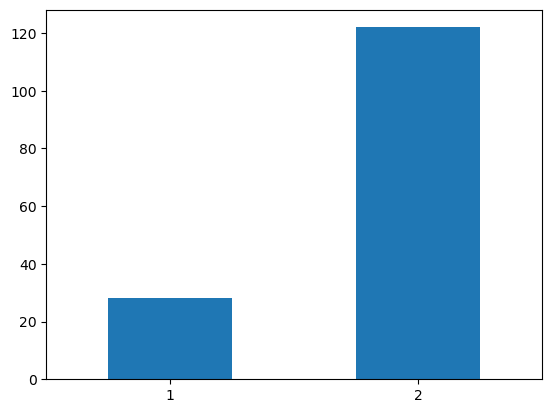

In [1282]:
instructor = teaching['Native_speaker'].value_counts().sort_index()

instructor.plot(kind='bar')
plt.xticks(rotation=0)

**Observations**
- By seeing the above bar graph we can say that , there are more non english native speaker than english speakers.

In [1283]:
teaching['Instructor'].nunique()

25

**The Course instructor has 25 categories**

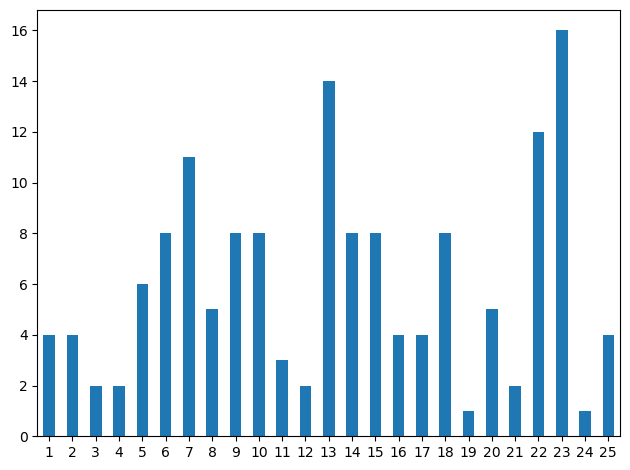

In [1284]:
instructor= teaching['Instructor'].value_counts().sort_index()

instructor.plot(kind='bar')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


**Observations**
- By seeing above graph we can say that there are 25 catagories has course instructor.
- In that 25 instructor 23 rd catagory is the highest.

In [1285]:
teaching['Course'].nunique()

26

**Course-26 categories**

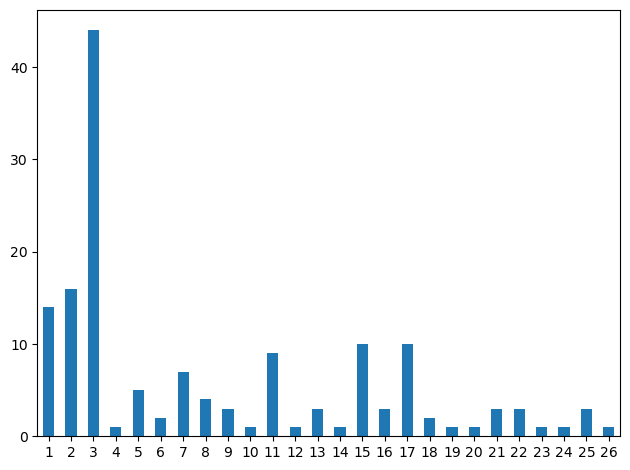

In [1286]:
Course= teaching['Course'].value_counts().sort_index()

Course.plot(kind='bar')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

**Observations**
- The course has a 26 categories , in that 26 the 3rd categories have nore teaching assistance

In [1287]:
teaching['semester_type'].value_counts()

2    128
1     22
Name: semester_type, dtype: int64

**1=Summer                                
2=Regular**

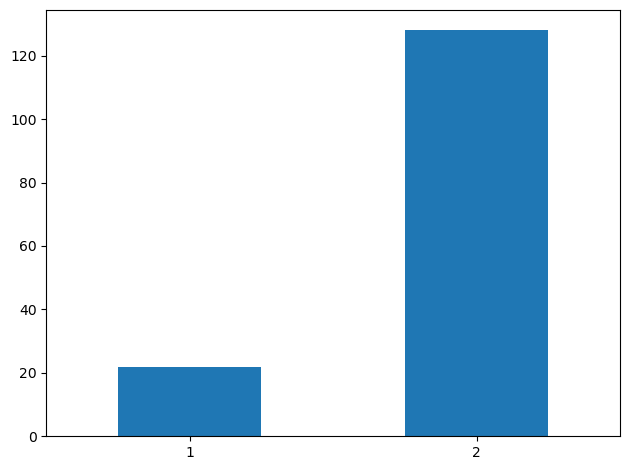

In [1288]:
semester= teaching['semester_type'].value_counts().sort_index()

semester.plot(kind='bar')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

**Observations**

- There are two types that are Summer and regular type.
- In that 1 is a summer type and 2 is a regular type.
- By looking at above graph we can say that regular teaching are more

In [1289]:
teaching['class_size'].nunique()

46

In [1290]:
teaching['class_size'].value_counts()

20    11
19    10
27     7
42     7
17     6
10     6
38     6
37     6
31     6
29     6
24     5
13     4
11     4
21     4
30     4
48     3
39     3
23     3
22     3
25     3
51     3
36     3
18     2
14     2
15     2
12     2
45     2
28     2
49     2
43     2
9      2
58     2
55     2
46     2
33     2
7      1
5      1
44     1
16     1
54     1
66     1
3      1
34     1
32     1
35     1
26     1
Name: class_size, dtype: int64

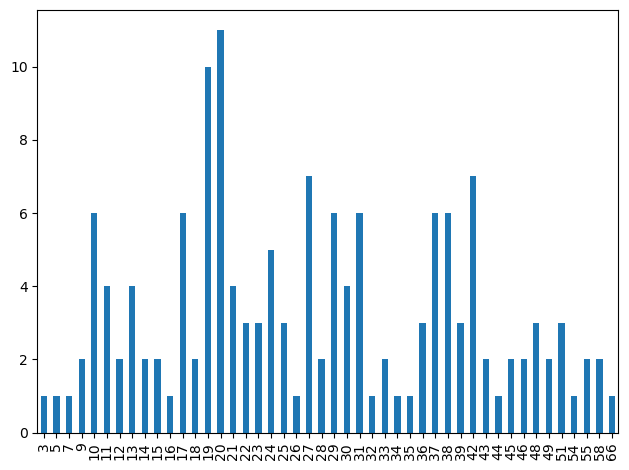

In [1291]:
class_size= teaching['class_size'].value_counts().sort_index()

class_size.plot(kind='bar')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

**Observations**
- We have a class size of 46 , in that 20 as a more data.

In [1292]:
teaching['category'].value_counts()

3    51
2    50
1    49
Name: category, dtype: int64

In [1309]:
z={1:0,2:1,3:2}
teaching['category']=teaching['category'].map(z)

**0=Low                            
1=Medium                                       
2=High**         

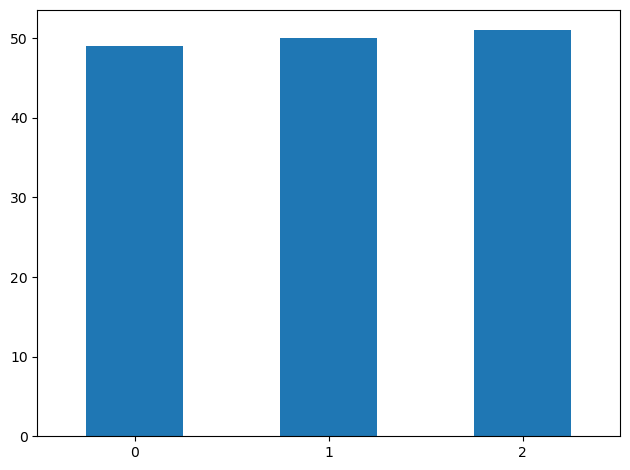

In [1310]:
category= teaching['category'].value_counts().sort_index()

category.plot(kind='bar')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

**Observations**
- There are three teaching category that high, low ,medium.
- By above graph we can say that all have almost same data, and high has more data.

## Standardizing 

In [1311]:
from sklearn.preprocessing import StandardScaler

In [1312]:
scale = StandardScaler()

In [1313]:
teaching[['Native_speaker','Instructor','Course','semester_type','class_size']]=scale.fit_transform(teaching[['Native_speaker','Instructor','Course','semester_type','class_size']])

In [1314]:
teaching.head()

,Native_speaker,Instructor,Course,semester_type,class_size,category
0,0.479070,0.209359,-0.733087,-2.412091,-0.848787,2
1,-2.087377,1.388849,-0.733087,0.414578,1.636983,2
2,-2.087377,-1.265002,-0.875711,0.414578,0.394098,2
3,0.479070,-0.970130,0.407904,0.414578,2.103064,2
4,0.479070,1.388849,-0.733087,-2.412091,-0.615746,2


**Observations**
- We standardize the data by importing standardscaler.

## Splitting features and target

In [1316]:
Y=teaching.pop('category')
X=teaching

## Splitting training and testing data

In [1317]:
from sklearn.model_selection import train_test_split

In [1318]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=8)
print(X.shape, X_train.shape, X_test.shape)

(150, 5) (120, 5) (30, 5)


**Observations**
- We split the data using train test split , after splitting we got 120 rows and 5 columns in train data.
- In test data we have 30 rows and 5 columns

## KNeighbors

In [1319]:
from sklearn.neighbors import KNeighborsClassifier

In [1320]:
KNC=KNeighborsClassifier(n_neighbors=15)

In [1321]:
KNC.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=15)

In [1322]:
KNC.predict(X_train)

array([2, 1, 1, 2, 0, 1, 0, 2, 0, 1, 0, 2, 2, 1, 1, 0, 2, 2, 1, 2, 0, 2,
       2, 2, 0, 0, 1, 2, 1, 2, 2, 2, 2, 0, 1, 1, 0, 2, 0, 0, 0, 0, 2, 1,
       1, 1, 1, 0, 2, 2, 2, 2, 1, 0, 2, 0, 1, 0, 2, 0, 0, 2, 2, 2, 2, 2,
       0, 2, 2, 0, 0, 0, 0, 2, 0, 0, 2, 1, 2, 2, 2, 1, 2, 2, 0, 2, 1, 2,
       0, 1, 0, 1, 2, 2, 2, 1, 0, 1, 1, 1, 1, 1, 1, 0, 2, 1, 1, 1, 0, 0,
       0, 2, 0, 1, 0, 2, 0, 2, 1, 1], dtype=int64)

In [1352]:
score_KNN=KNC.score(X_train,Y_train)
print('accuracy score on training: ',score_KNN)

accuracy score on training:  0.5916666666666667


In [1353]:
KNC.predict(X_test)

array([2, 0, 0, 2, 1, 0, 0, 0, 2, 1, 2, 0, 1, 2, 0, 2, 0, 1, 0, 1, 1, 2,
       0, 1, 2, 2, 1, 1, 2, 0], dtype=int64)

In [1354]:
score_test=KNC.score(X_train,Y_train)
print('accuracy score on testing: ',score_test)

accuracy score on testing:  0.5916666666666667


**Observations**
- We used K neighbors classification to find out the accuracy of the test and train data.
- In train data we got the accuracy of 0.59
- In test data we got the accuracy of 0.59

## Decision Tree

In [1329]:
from sklearn.tree import DecisionTreeClassifier

In [1330]:
tree = DecisionTreeClassifier()

In [1331]:
tree.fit(X_train,Y_train)

DecisionTreeClassifier()

In [1332]:
tree.predict(X_train)

array([2, 2, 1, 2, 2, 0, 1, 2, 0, 1, 0, 2, 2, 1, 0, 2, 2, 2, 0, 0, 0, 1,
       1, 2, 1, 2, 1, 2, 0, 2, 2, 2, 1, 0, 2, 1, 0, 0, 1, 1, 0, 0, 2, 1,
       2, 0, 1, 0, 0, 2, 2, 2, 1, 0, 2, 0, 0, 2, 0, 0, 2, 2, 2, 1, 2, 1,
       2, 2, 1, 0, 0, 0, 1, 2, 1, 0, 1, 1, 0, 2, 2, 1, 0, 2, 0, 1, 1, 1,
       0, 0, 0, 2, 0, 0, 2, 1, 0, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 0, 0,
       1, 2, 0, 2, 1, 2, 1, 1, 1, 2], dtype=int64)

In [1355]:
score_train=tree.score(X_train,Y_train)
print("accuracy is: ",score_train)

accuracy is:  0.9666666666666667


In [1334]:
tree.predict(X_test)

array([2, 0, 0, 2, 0, 0, 1, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 1, 1, 2,
       0, 1, 0, 2, 1, 2, 2, 1], dtype=int64)

In [1356]:
test_score=tree.score(X_test,Y_test)
print('accuracy on testing: ',test_score)

accuracy on testing:  0.6666666666666666


**Observations**
- We used decision tree to find out the accuracy of the test and train data.
- In train data we got the accuracy of 0.9
- In test data we got the accuracy of 0.6.
- As we can see this not best algorithm cuz it do not have accurate.



## Random forest

In [1336]:
from sklearn.ensemble import RandomForestClassifier

In [1337]:
rf_classifier=RandomForestClassifier()

In [1338]:
rf_classifier.n_estimators = 200 # Number of trees in the forest
rf_classifier.max_depth = None  # Maximum depth of each tree
rf_classifier.min_samples_split = 50 # Minimum number of samples required to split an internal node
rf_classifier.min_samples_leaf = 50  # Minimum number of samples required to be at a leaf node

In [1339]:
rf_classifier.fit(X_train,Y_train)

RandomForestClassifier(min_samples_leaf=50, min_samples_split=50,
                       n_estimators=200)

In [1340]:
random.predict(X_train)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [1357]:
scorer=random.score(X_train,Y_train)
print('accuracy score on training: ',scorer)

accuracy score on training:  0.3416666666666667


In [1342]:
random.predict(X_test)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [1358]:
score_testing=random.score(X_test,Y_test)
print('accuracy is: ',score_testing)

accuracy is:  0.3


**Observations**
- We used random forest to find out the accuracy of the test and train data.
- In train data we got the accuracy of 0.34
- In test data we got the accuracy of 0.3
- This algorithm does not have accuracy.

## XGBOOST

In [1345]:
import xgboost as xgb
from xgboost import XGBClassifier

In [1346]:
clf_xgb=XGBClassifier()

In [1348]:
clf_xgb.fit(X_train,Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [1361]:
clf_xgb.predict(X_train)

array([2, 2, 1, 2, 2, 0, 1, 2, 0, 1, 0, 2, 2, 1, 0, 2, 2, 2, 0, 0, 0, 1,
       1, 2, 1, 2, 1, 2, 0, 2, 2, 2, 1, 0, 2, 1, 0, 2, 1, 1, 0, 0, 2, 1,
       2, 0, 1, 0, 0, 2, 2, 2, 1, 0, 2, 0, 0, 2, 0, 0, 2, 2, 2, 1, 2, 1,
       2, 2, 1, 0, 0, 0, 1, 2, 1, 0, 2, 1, 0, 2, 2, 1, 2, 2, 0, 2, 1, 1,
       0, 0, 0, 2, 0, 0, 2, 1, 0, 2, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 0, 0,
       1, 2, 0, 2, 1, 2, 1, 1, 1, 2], dtype=int64)

In [1362]:
training=clf_xgb.score(X_train,Y_train)
print('accuracy is: ',training)

accuracy is:  0.9583333333333334


In [1363]:
clf_xgb.predict(X_test)

array([2, 0, 0, 2, 0, 0, 1, 0, 1, 0, 2, 0, 1, 2, 1, 0, 0, 1, 0, 1, 1, 2,
       0, 1, 2, 2, 1, 2, 2, 0], dtype=int64)

In [1364]:
testing=clf_xgb.score(X_test,Y_test)
print('accuracy is: ',testing)

accuracy is:  0.7


**Observations**
- We used XGBoost to find out the accuracy of the test and train data.
- In train data we got the accuracy of 0.95
- In test data we got the accuracy of 0.7
- This is the best algorithm to finout the accuracy.

# Conclusion

- Performed modelling using various algorithms and also evaluated metrics such as training score and testing score.
- So after performing through various algorithm we came to know that XGBoost is best with training score = 0.95 and testing score = 0.7.
- We started our project by importing necessary models,loaded the dataset successfully and get the information of the data.
- We performed data exploration on all necessary data to check which is supported and which is not supported.



# Model Selection

- According to Model evalution dataframe matrics dataframe, the test score .
- And we also selected Decision tree algorithm,Kneighbour classification,Random forest
- As we can see in this accuracy the best result got in XGBoost algorithm.

# Challenges Faced 

- Faced some challenges in getting the resources and handkling mismatch values.
- We felt little challenging when we start working on different algorithms and also choosing quite number of algorithms to work upon.
- Deciding about the best model of prediction.
